# **Detección de Células Infectadas con Malaria en Imágenes de Frotis de Sangre**

*Integrantes:*
*  Daniela Gluj (63404)
*  Olivia Grosso (62779)

*Docentes:*
*  Roberto Sebastián Tomás
*  Francisco Joaquín Tassara
*  Aylin Agatha Vazquez Chenlo
*  Victoria Reppucci

*Fecha de entrega:* 16 de Diciembre de 2024

# **INTRODUCCIÓN**

Tradicionalmente, el método más utilizado para diagnosticar malaria es el análisis microscópico de frotis sanguíneos tratados con distintas técnicas de tinción, donde se buscan y cuantifican los parásitos presentes en los glóbulos rojos. Sin embargo, este método puede ser lento y depende de la experiencia del técnico de laboratorio.

En este contexto, el uso de técnicas de procesamiento de imágenes ofrece una alternativa prometedora para mejorar la eficiencia y precisión del diagnóstico.

El presente trabajo se centra en el desarrollo de un algoritmo de Python para la detección de parásitos de malaria a partir de imágenes de frotis sanguíneos. Utilizando herramientas de procesamiento de imágenes, como la segmentación y el análisis de texturas, se busca identificar las características de los eritrocitos infectados y a partir de estas diferenciarlos de las células sanas.

El objetivo general es desarrollar una primera aproximación a una herramienta de diagnóstico que pueda integrarse fácilmente en sistemas de salud digital, con el potencial de ser utilizada en áreas con limitaciones de acceso a tecnología avanzada. Esta solución podría mejorar significativamente la capacidad de los profesionales médicos para diagnosticar la malaria de manera eficiente y efectiva.

Se acompañó el trabajo con la presentación *"Detección de Células Infectadas con Malaria en Imágenes de Frotis de Sangre"* donde se expone el marco teórico, el estado de arte, los objetivos y un resumen en formato de diagrama de flujo de lo realizado en el presente Colab.

# **MARCO TEÓRICO**

La malaria, también conocida como paludismo, es una enfermedad infecciosa causada por parásitos del género Plasmodium, que se transmiten a los humanos a través de la picadura de mosquitos hembras del género Anopheles. No se transmite de persona a persona, ya que la infección solo ocurre cuando el mosquito infectado introduce el parásito en el torrente sanguíneo. [1]

Hay cinco especies de parásitos Plasmodium que causan el paludismo en el ser humano, dos de las cuales (P. faciparum y P. vivax) entrañan un mayor riesgo. P. falciparum es el parásito del paludismo más mortífero y el más prevalente en el continente africano. P. vivax es el parásito dominante en la mayoría de los países fuera del África Subsahariana. Las otras especies que pueden infectar a los humanos son P. malariae, P. ovale y P. knowlesi.

Los síntomas iniciales de esta enfermedad incluyen fiebre, escalofríos, sudoración, dolores musculares y cefalea, que pueden evolucionar hacia complicaciones graves, como anemia severa, insuficiencia multiorgánica, convulsiones, dificultad respiratoria y hemorragias anormales. Entre los signos más severos se encuentran la fatiga extrema, alteración del estado de consciencia, orina de color oscuro o con sangre, y la ictericia (coloración amarillenta de la piel y los ojos). En casos graves, la malaria puede ser fatal, especialmente en ausencia de tratamiento oportuno.

Según el último Informe mundial sobre el paludismo, en 2023 hubo 249 millones de casos de la enfermedad, un aumento respecto de los 244 millones que hubo en 2021. Se calcula que en 2022 la enfermedad causó la muerte de 608 000 personas, frente a las 610 000 muertes registradas en 2021. De allí la importancia de su correcto diagnóstico. [2]

La malaria sigue siendo una de las principales causas de enfermedad y muerte en las regiones tropicales y subtropicales. La Región de África es la más afectada, soportando una carga desproporcionadamente alta de la enfermedad (*figura 1*). En 2022, esta región concentró aproximadamente el 94% de los casos de malaria y el 95% de las muertes globales. Además, el 78% de las muertes por malaria en África corresponden a niños menores de cinco años. [2]


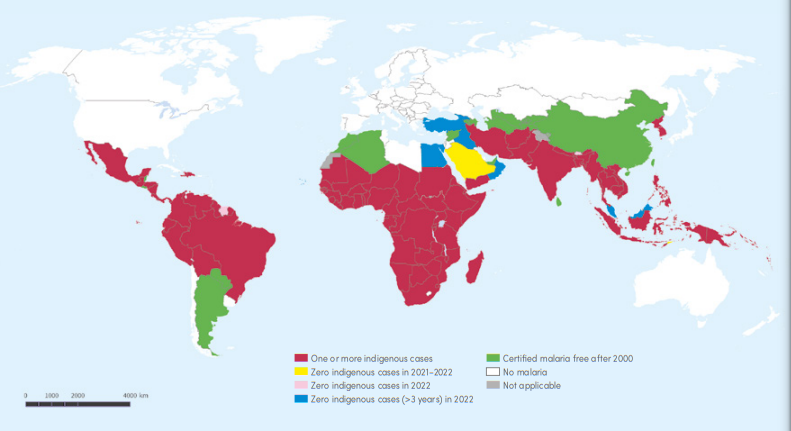

*Figura 1: Distribución de casos malaria en el mundo (2022)* [2]

Cuatro países en particular Nigeria (26,8%), la República Democrática del Congo (12,3%), Uganda (5,1%) y Mozambique (4,2%) concentraron más de la mitad de todas las muertes a nivel mundial  (*figura 2* ), lo que subraya el impacto devastador de la enfermedad en el continente africano.

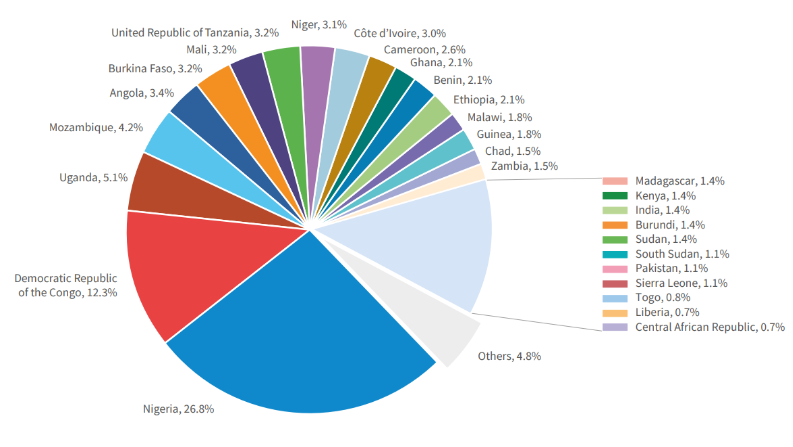

*Figura 2: Distribución de muertes causadas por Malaria (2022)* [2]

## **Métodos para la detección de Malaria**

El diagnóstico oportuno de la malaria es esencial para reducir la morbilidad y mortalidad. Existen varios métodos de detección que varían en precisión, costo y accesibilidad:


**Microscopía Óptica**

Es el método de referencia para el diagnóstico de la malaria y es ampliamente utilizado en regiones endémicas. Consiste en examinar frotis de sangre teñidos con colorante Giemsa, lo que permite identificar visualmente tanto la especie como la cantidad de parásitos de Plasmodium en los glóbulos rojos. Sin embargo, la eficacia del diagnóstico depende de la habilidad del microscopista,  lo que puede limitar su efectividad en áreas de pocos recursos. [3][4][5]


**Pruebas de diagnóstico rápido** (RDT)

Utilizan la inmunocromatografía para detectar antígenos específicos de Plasmodium en la sangre. Estas pruebas son rápidas y fáciles de usar, lo que las hace útiles en áreas remotas. Sin embargo, tienen una sensibilidad limitada, especialmente en infecciones con bajos niveles parasitarios. Esto significa que, en ciertos casos, las RDT pueden no detectar infecciones leves o tempranas, lo que puede comprometer la efectividad del tratamiento temprano. Además, estas pruebas no siempre son capaces de diferenciar entre las diferentes especies de Plasmodium, lo que limita su capacidad para orientar adecuadamente el tratamiento, ya que algunas especies, como Plasmodium falciparum, requieren tratamientos específicos debido a su alta virulencia y riesgo de complicaciones graves. [3][4]


**Reacción en cadena de la polimerasa** (PCR)

Técnica molecular avanzada que permite amplificar pequeñas cantidades de ADN del parásito, haciéndolo detectable incluso en casos de parasitemia baja, donde otros métodos diagnósticos pueden fallar. Gracias a su alta sensibilidad y especificidad, el PCR no solo detecta la presencia del parásito, sino que también puede identificar las especies de Plasmodium, lo cual es crucial para guiar el tratamiento adecuado. Este método es especialmente útil en infecciones mixtas o en aquellas que son difíciles de diagnosticar por microscopía. No obstante, es un método costoso que requiere equipos especializados, lo que hace que su uso en áreas rurales y en países con escasos recursos sea menos viable. [4][5]

**Espectroscopía de láser**

Se basa en detectar la hemozoína, un pigmento cristalino que es un subproducto del metabolismo del parásito Plasmodium al descomponer la hemoglobina en los glóbulos rojos infectados. Esta técnica aprovecha las propiedades ópticas de la hemozoína, que absorbe luz en longitudes de onda específicas. Al irradiar la sangre con un láser, se genera una señal óptica que puede medirse y asociarse con la presencia de parásitos en el torrente sanguíneo.

Este enfoque ofrece ventajas como ser no invasivo y capaz de identificar infecciones en etapas tempranas, incluso con bajas concentraciones de parásitos (baja parasitemia). No obstante, a pesar de su potencial, la espectroscopía láser aún se encuentra en fases de desarrollo y no ha sido implementada ampliamente en entornos clínicos. Las investigaciones actuales están enfocadas en mejorar la sensibilidad, especificidad y viabilidad económica de esta tecnología para su uso rutinario en áreas endémicas de malaria. Uno de los desafíos principales es adaptar la tecnología para su uso en entornos con pocos recursos, ya que actualmente requiere equipamiento costoso y personal capacitado. [5]


**Microscopía automatizada**

Este enfoque utiliza algoritmos de inteligencia artificial para analizar frotis de sangre, identificando de manera automática los eritrocitos infectados y los parásitos de *Plasmodium*, sin la necesidad de un microscopista altamente capacitado.

En los últimos años, los métodos de imágenes computacionales microscópicas para la detección de objetos han ganado gran relevancia en estudios médicos y biomédicos. Diversas aplicaciones y herramientas de software se están desarrollando para detectar parásitos de malaria en imágenes de frotis de sangre utilizando microscopía de luz convencional [16][17][18][19].

Hoy en día, los algoritmos de detección automatizada de malaria se basan en técnicas de procesamiento de imágenes y redes neuronales profundas, como las redes neuronales convolucionales (CNN). Estos sistemas replican la observación visual que realizaría un microscopista, pero con mayor rapidez y precisión. Los algoritmos automatizados, especialmente las CNN, procesan imágenes segmentándolas y extrayendo características de color, textura y forma para identificar patrones específicos asociados a células infectadas. Los programas avanzados no solo identifican la presencia de parásitos, sino que también pueden diferenciar entre especies de *Plasmodium* y las distintas etapas de desarrollo del parásito dentro de los glóbulos rojos.

Uno de los principales beneficios de esta tecnología es su capacidad para reducir el error humano asociado con la fatiga y la variabilidad entre operadores, lo que puede mejorar significativamente la precisión del diagnóstico. Además, este enfoque tiene el potencial de procesar un gran volumen de muestras en un tiempo relativamente corto, lo que lo hace ideal para entornos con alta carga de malaria. La automatización también podría ser particularmente útil en áreas rurales o de bajos recursos, donde los microscopistas capacitados son escasos.

A pesar de sus ventajas, la microscopía automatizada aún enfrenta desafíos técnicos, como el perfeccionamiento de los algoritmos para mejorar la sensibilidad y la especificidad en la detección de infecciones con bajos niveles parasitarios. Además, la implementación generalizada de esta tecnología requiere infraestructura adecuada y una inversión inicial significativa, lo que limita su accesibilidad en muchas regiones endémicas. A medida que la tecnología avance y se abaraten los costos, es probable que esta herramienta desempeñe un papel clave en el diagnóstico de la malaria a nivel global. [5]


## **Características Histológicas**

Cada especie de Plasmodium presenta diversas formas y características morfológicas a lo largo de su ciclo de vida en el huésped humano. Estas incluyen tanto las formas asexuadas, como los trofozoítos y esquizontes, como las formas sexuadas, o gametocitos. Las particularidades en la apariencia del parásito, junto con los cambios que provoca en los glóbulos rojos, permiten distinguir entre las diferentes especies (*figura 3* ). La variación en el tamaño, forma y presencia de inclusiones en los eritrocitos también son indicadores clave que ayudan a la correcta identificación del parásito. [6][7][8][9]


**1. Anillo (Trofosoito temprano):** Fase inicial que se observa en los glóbulos rojos tras la invasión del parásito. En esta etapa, el parásito tiene una forma de anillo que rodea un núcleo. Esta fase es clave para el diagnóstico, ya que es la más temprana visible en los frotis de sangre.

**2. Trofosoito:** En esta etapa, el parásito se desarrolla y crece dentro del eritrocito. Este estado se caracteriza por la presencia de pigmento malárico, un subproducto del metabolismo de la hemoglobina. La forma y el tamaño del trofozoito pueden variar, lo que puede ayudar en la identificación de la especie.

**3. Esquizonte:** Durante esta fase, el parásito se multiplica dentro del glóbulo rojo mediante división asexual, formando múltiples núcleos. Este proceso puede resultar en la aparición de varios trofozoítos dentro de un solo glóbulo rojo, lo que se puede observar en un frotis sanguíneo.
La cantidad de núcleos y la morfología del esquizonte son cruciales para la identificación de la especie de Plasmodium.

**4. Gametocito:** Esta es la fase sexual del ciclo de vida del parásito. Los gametocitos son esenciales para la transmisión del parásito a los mosquitos, donde completan su ciclo de vida. Dependiendo de la especie, los gametocitos pueden tener formas distintas.


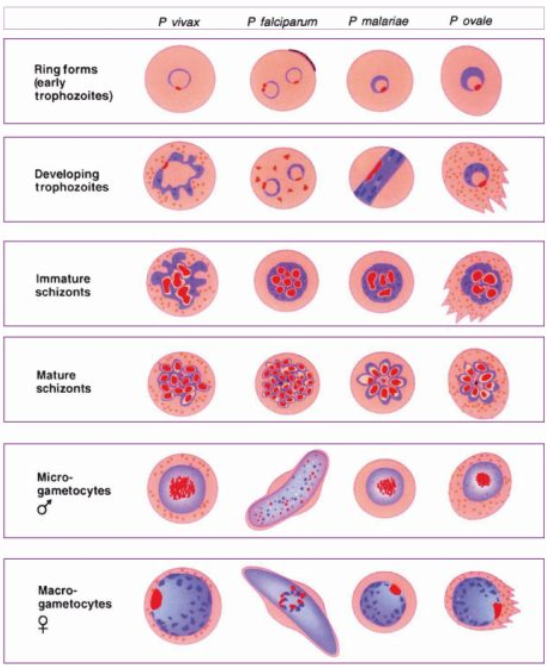

*Figura 3: Especies de Plasmodium en sus diferentes etapas de vida* [9]

**Plasmodium Falciparum**

En los trofozoítos tempranos, conocidos por su forma de anillo, se observa un anillo delgado de citoplasma con un punto de cromatina oscuro, y es común que haya múltiples anillos en un mismo glóbulo rojo. A medida que el trofozoito madura, el anillo se vuelve más grueso y se acumula pigmento.

En la fase de esquizonte, el parásito se multiplica y forma varios núcleos, aunque esta fase no suele ser visible en la sangre periférica debido al secuestro de las células infectadas.

Finalmente, los gametocitos presentan una forma alargada distintiva, similar a una media luna, característica de esta especie.


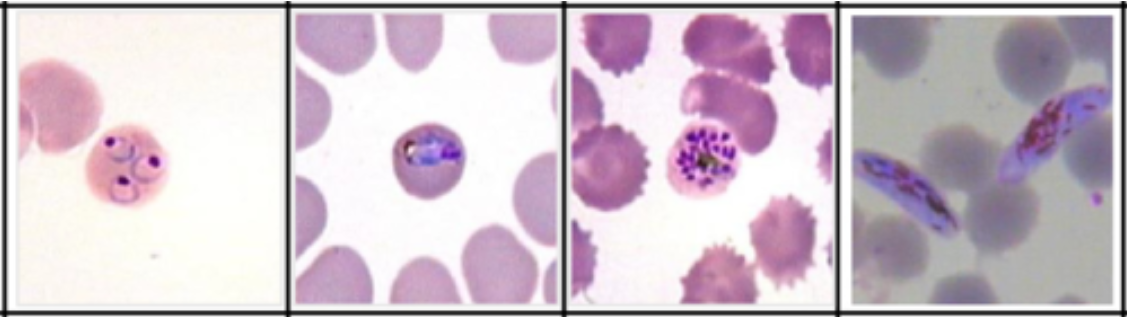

*Figura 4: Plasmodium Falciparum en sus diferentes etapas de vida* [10]

**Plasmodium Vivax**

En la fase de trofozoito temprano, los eritrocitos suelen ser más grandes de lo normal (hipertrofia), ya que el P. vivax tiene una preferencia por infectar glóbulos rojos jóvenes. El parásito en esta etapa tiene una forma de anillo, similar a P. falciparum, pero con una estructura más gruesa y menos definida, a menudo presentando un único punto de cromatina. Además, en los eritrocitos se pueden observar puntos de Schüffner, que son inclusiones citoplasmáticas distintivas.

En la fase de esquizonte, el P. vivax muestra una división más clara en múltiples núcleos (16-24 merozoítos), con fragmentos de cromatina bien diferenciados. En esta etapa, el tamaño del eritrocito infectado es notablemente mayor, lo que facilita su diferenciación de otras especies.

Finalmente, los gametocitos de P. vivax son redondos u ovalados y más grandes que los gametocitos de P. falciparum. Los glóbulos rojos infectados también suelen ser más grandes y, al igual que en las otras etapas, pueden mostrar puntos de Schüffner.



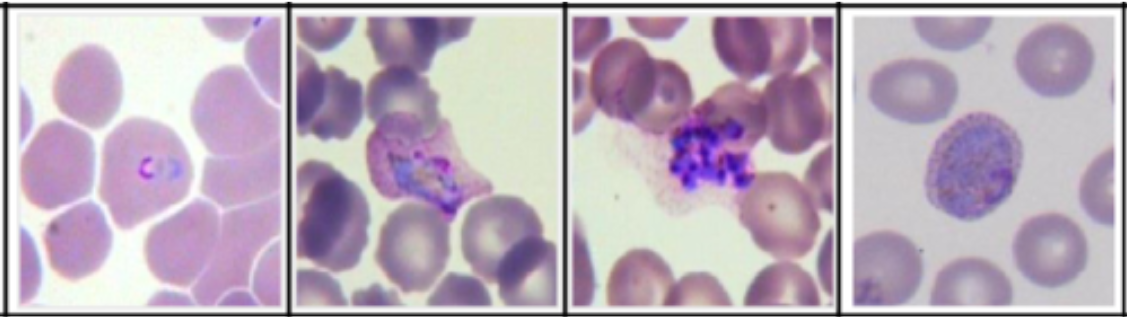

*Figura 5: Plasmodium Vivax  en sus diferentes etapas de vida* [11]

**Plasmodium Ovale**

La apariencia microscópica de P. ovale es muy similar a la de P. vivax, y si se observan sólo un pequeño número de parásitos, puede ser imposible distinguir entre las dos especies sólo con criterios morfológicos. No hay diferencia en el tratamiento médico entre P. ovale y P. vivax, por lo que algunos diagnósticos de laboratorio informan "P. vivax/ovale", lo cual es perfectamente aceptable, dado que el tratamiento para ambas es muy similar.

Aproximadamente un 20% de las células infectadas tienen forma ligeramente ovalada,  y algunas de ellas tienen además fimbrias en los bordes, las llamadas células cometas. Los esquizontes maduros de P. ovale, nunca llegan a tener más de doce núcleos en su interior y ese es un criterio fiable para distinguir las dos especies.


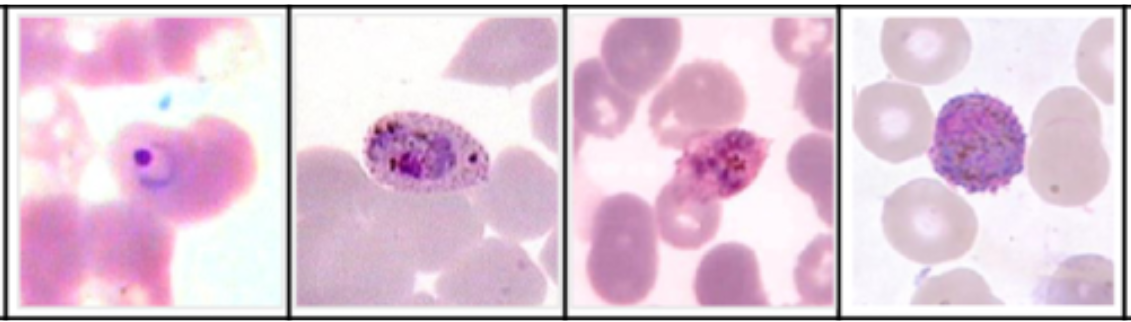

*Figura 6: Plasmodium Ovale  en sus diferentes etapas de vida* [12]

**Plasmodium Malariae**

En los trofozoítos tempranos, se observa un anillo  de citoplasma con un punto de cromatina oscuro. Los trofozoítos más maduros presentan un citoplasma compacto y un gran punto de cromatina en forma de banda que los distingue de otras especies.

En el estadio esquizonte, P. malariae se distingue por tener una cantidad de núcleos que generalmente oscila entre 6 y 12, distribuidos de manera regular en el citoplasma. Este parásito también presenta pigmento malárico, que puede ser menos evidente en comparación con las otras especies.

En cuanto a los gametocitos, pueden ser reconocidos por su forma ovalada y la presencia de un citoplasma denso, lo que es característico de esta especie. Los gametocitos de P. malariae tienden a ser más pequeños que los de otras especies, lo que contribuye a su identificación morfológica.


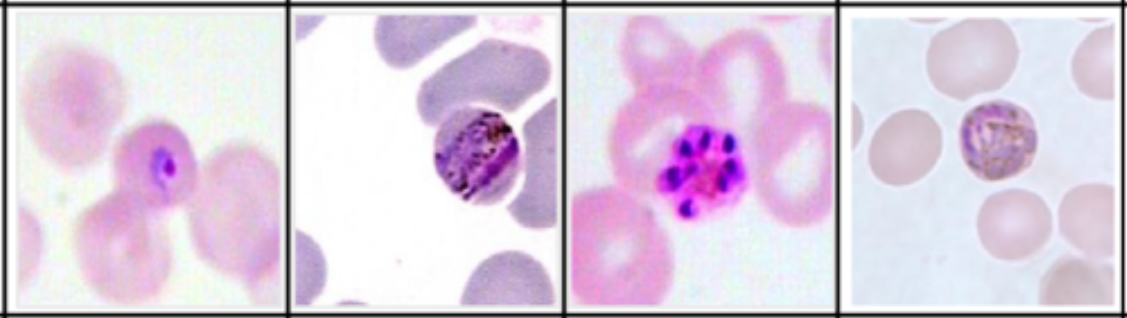

*Figura 6: Plasmodium Malariae  en sus diferentes etapas de vida* [13]

## **Densidad Parasitaria**

La estimación de la densidad parasitaria en un frotis de sangre es crucial para diagnosticar y evaluar la gravedad de la malaria. El proceso comienza seleccionando una zona del frotis con campos de visión uniformes, generalmente en el extremo distal. Luego, se cuentan los glóbulos rojos en un campo y se calcula cuántos campos son necesarios para alcanzar un total de 10,000 glóbulos. Es esencial examinar múltiples áreas del frotis, ya que la distribución de los parásitos puede variar significativamente. Se recomienda contar en al menos 100 a 200 campos para obtener una representación más precisa y minimizar errores.

A continuación, se registran los glóbulos rojos parasitados, recordando que un eritrocito con múltiples parásitos cuenta como uno solo. Para calcular el porcentaje de glóbulos rojos infectados, se utiliza la fórmula que divide el número de glóbulos parasitados entre 10,000 y se multiplica por 100. Se considera elevada una parasitemia del 1% y hiperparasitemia a partir del 5%.


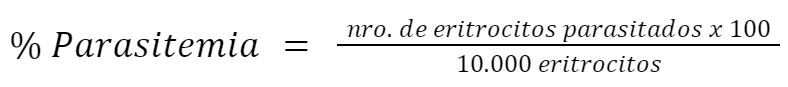

Para estandarizar el diagnóstico, es recomendable informar la densidad parasitaria en términos de parásitos por microlitro de sangre. Si no se dispone de los parámetros hematológicos, se asume un valor constante de 5,000,000 glóbulos rojos por microlitro. Este método no solo indica la presencia del parásito, sino que también ayuda a evaluar la gravedad de la infección y a guiar el tratamiento adecuado.


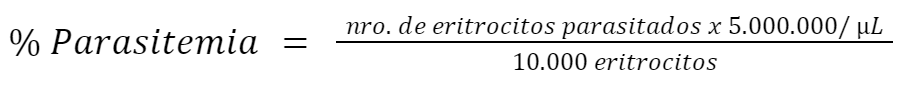

In [ ]:
# consideraria redefinir esto de parasitemia

# **MATERIALES Y MÉTODOS**

En el presente trabajo se utilizaron imágenes obtenidas de una base de datos pública. Dicho dataset cuenta con imágenes de frotis de sangre teñidos con Giemsa, preparados por diferentes investigadores de diferentes regiones. Cada imagen contiene células no infectadas (glóbulos rojos) y células infectadas (anillos, trofozoítos esquizontes y gametocitos). [14]


Las imágenes fueron procesadas mediante técnicas de procesamiento digital implementadas en Python, utilizando funciones propias así como también varias librerías especializadas. En cuanto a estas últimas, se empleó la librería OpenCV (cv2) para la lectura y visualización de las imágenes, así como para operaciones básicas de procesamiento.

La segmentación y transformación de las imágenes se realizaron utilizando métodos de convolución y detección de bordes a través de funciones de scipy.ndimage y SimpleITK, asi como otras funciones hechas particularmente para este trabajo.

El análisis de agrupamiento para la clasificación de características texturales se llevó a cabo con el algoritmo K-Means, implementado con la librería sklearn.cluster. Las matrices de co-ocurrencia de niveles de gris (GLCM) se calcularon con funciones de la librería skimage.feature para extraer propiedades texturales de las imágenes.

## **Librerías**

In [ ]:
# Me las tengo que instalar

In [1]:
!pip install SimpleITK

In [2]:
pip install scikit-image==0.19.3

  Using cached scikit-image-0.19.3.tar.gz (22.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\gross\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "c:\Users\gross\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gross\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gross\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 379, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "c:\Users\gross\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\r

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage as snd
from scipy.ndimage import distance_transform_edt
from sklearn.cluster import KMeans
from skimage import io, filters
import SimpleITK as sitk
import warnings
warnings.filterwarnings("ignore")
from skimage.feature import graycomatrix, graycoprops

# **PROCEDIMIENTO**

El algoritmo de procesamiento de imágenes desarrollado en este trabajo tiene como objetivo la detección de células infectadas con malaria, replicando el proceso que seguiría un operador humano mediante microscopía. Este sistema identifica y localiza glóbulos rojos infectados en estado avanzado dentro de un campo microscópico de una muestra de sangre. Una vez detectadas las células infectadas, el algoritmo las marca en la imagen y, además, realiza un conteo de la cantidad de células infectadas en relación con el total de glóbulos rojos presentes en el campo de observación.

A continuación, se observa un diagrama de flujo del algoritmo desarrollado:

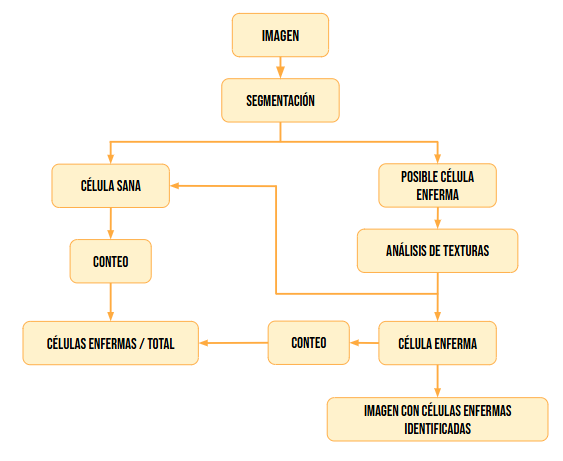

## **Cargar Archivos**

En primer lugar, montamos Google Drive para acceder a los archivos almacenados y cargamos la imagen deseada utilizando la biblioteca cv2 de OpenCV. A continuación, se visualiza la imagen seleccionada.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

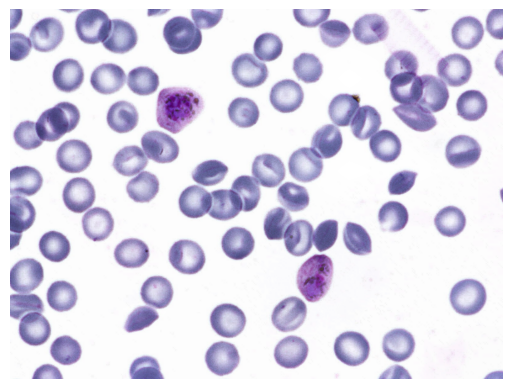

In [ ]:
# Nombre del archivo de imagen
img = "7.png"

# Ruta donde se encuentra la imagen (sin el nombre del archivo)
path = "/content/drive/MyDrive/TP Final PSIB/Imágenes/Datos/"

# Concatenar la ruta con el nombre del archivo
full_path = os.path.join(path, img)

# Cargar la imagen
img_original = cv2.imread(full_path)

# Convertir la imagen de BGR a RGB (ya que cv2 abre la imagen con los canales invertidos)
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Chequeo el tamaño de la imagen
print(f"Forma de filtered_image: {img_rgb.shape}")

Forma de filtered_image: (1200, 1600, 3)


Al tratarse de una imagen en formato RGB, se muestran de forma individual los tres canales de color (rojo, verde y azul). El propósito de esta separación es identificar cuál de los canales presenta un mayor contraste entre las diferentes estructuras de la imagen. Este análisis permitirá seleccionar el canal más adecuado para la posterior segmentación, con el fin de diferenciar las células infectadas de las normales a partir de su nivel de intensidad de gris.

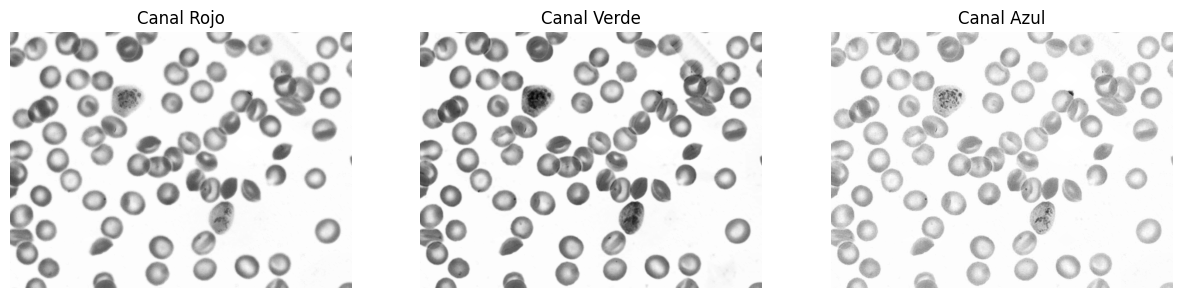

In [ ]:
# Separar la imagen en sus canales RGB
canal_rojo = img_rgb[:,:,0]
canal_verde = img_rgb[:,:,1]
canal_azul = img_rgb[:,:,2]

# Mostrar cada canal
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(canal_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(canal_verde, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(canal_azul, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')

plt.show()

Aunque inicialmente podría parecer que el canal verde es el más adecuado debido a que las células infectadas se ven más oscuras, el canal azul ofrece un mayor contraste de los trofozoítos presentes dentro de las células infectadas respecto su entorno. Este contraste más marcado permite una mejor detección y segmentación de las células infectadas por los parásitos.

## **Pre-procesamiento**

Se evaluó hacer un pre-procesamiento con la aplicación de filtros gaussianos, de mediana (para un ruido parecido a sal y pimienta). El filtro gaussiano se descartó porque el mismo disminuía la definición de los bordes, lo cual era útil para la segmentación de las células. El filtro de mediana no se decidió utilizar, ya que no aportaba una mejora significativa al resultado final y era poco eficiente.

In [ ]:
def gaussian_filter(image, kernel_size, sigma):

  # Verificar que el tamaño del kernel sea impar
  if kernel_size % 2 == 0:
      raise ValueError("El tamaño del kernel debe ser un número impar.")

  else:
    # Crear el kernel gaussiano
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 * sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)

    # Aplicar convolución
    filtered_image = convolve2d(image, kernel, mode='same', boundary='wrap')

    return filtered_image

In [ ]:
# Aplicar el filtro gaussiano
kernel_size = 5  # Debe ser impar
sigma = 1.0  # Desviación estándar
img_filtrada = gaussian_filter(canal_azul, kernel_size, sigma)

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada, cmap='gray')
plt.title('Imagen Filtrada con Filtro Gaussiano')
plt.axis('off')

plt.show()

In [ ]:
def zero_padding(image, pad_size):
  '''
  La función zero_padding aplica zero-padding a una imagen de cualquier tamaño.

  Parámetros:
    - image (numpy array): Imagen en escala de grises
    - pad_size (int): Tamaño del padding (número de píxeles) a agregar en cada borde de la imagen.

  '''

  # Obtener las dimensiones de la imagen original
  height, width = image.shape

  # Aplicar el padding a la imagen
  padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

  return padded_image

In [ ]:
def median_filter(image, kernel_size):

  # Verificar que el tamaño del kernel sea impar
  if kernel_size % 2 == 0:
      raise ValueError("El tamaño del kernel debe ser un número impar.")

  # Obtener las dimensiones de la imagen
  height, width = image.shape

  # Crear una imagen con padding para manejar los bordes
  pad_size = kernel_size // 2
  padded_image = zero_padding(image, pad_size)

  # Crear una matriz vacía
  filtered_image = np.zeros_like(image)

  # Aplicar el filtro de mediana
  for i in range(height):
      for j in range(width):
          neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
          median_value = np.median(neighborhood)
          filtered_image[i, j] = median_value

  return filtered_image

In [ ]:
img_mediana = median_filter(canal_azul, 5)

# Mostrar la imagen original y la imagen filtrada usando matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')  # Ocultar los ejes

plt.subplot(1, 2, 2)
plt.imshow(img_mediana, cmap='gray')
plt.title('Imagen con Filtro de Mediana')
plt.axis('off')  # Ocultar los ejes

plt.show()

## **Segmentación**

El principal objetivo de la segmentación es aislar las células infectadas de los eritrocitos sanos y del fondo de la imagen, permitiendo su identificación precisa para luego marcarlas sobre la imagen original y proporcionar un resultado visual claro. Para lograr esta diferenciación, se implementaron dos métodos de segmentación complementarios: el algoritmo K-Means y la segmentación basada en texturas. Ambos enfoques buscan destacar las características distintivas de las células infectadas, facilitando su correcta detección y análisis.








Se aplica el algoritmo K-Means para segmentar la imagen en diferentes grupos o clusters. Este es un algoritmo no supervisado que funciona asignando los píxeles a uno de los tres grupos de acuerdo con la similitud de sus valores de intensidad. El algoritmo comienza seleccionando de manera aleatoria tres centroides (uno para cada cluster). Luego, asigna cada píxel al cluster cuyo centroide sea el más cercano, y actualiza los centroides de los grupos de acuerdo con los promedios de los píxeles asignados. Este proceso se repite iterativamente hasta que los centroides se estabilizan y no cambian significativamente entre iteraciones.

En este caso, se busca agrupar los píxeles del canal azul de la imagen original en tres clusters, permitiendo así diferenciar entre el fondo, los glóbulos rojos sanos y los glóbulos rojos infectados.
Luego de aplicar el algoritmo de K-Means, se reconstruye la imagen segmentada utilizando las etiquetas obtenidas, de modo que cada cluster está representado por una etiqueta. Posteriormente, se identifica el fondo de la imagen determinando cuál es la etiqueta más frecuente, que típicamente corresponde a las áreas más grandes, como el fondo.
Por último, se reasignan los valores de intensidad de correspondientes a cada etiqueta:
- El fondo se marca en negro, con un valor de intensidad de 0.
- Los glóbulos rojos sanos se representan en gris, con un valor de 128.
- Los glóbulos rojos infectados se representan en blanco, con un valor de 255.

Finalmente, se visualiza la imagen resultante en escala de grises.




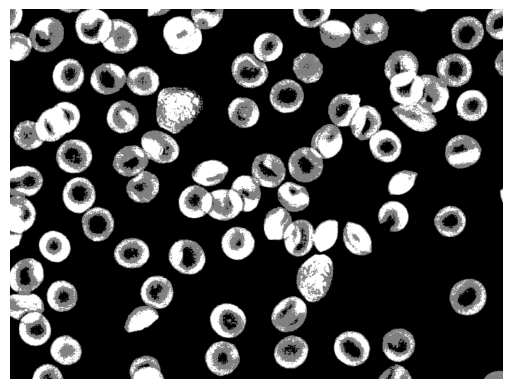

In [ ]:
canal_azul_reshape = canal_azul.reshape((-1, 1))
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(canal_azul_reshape)

# Obtener etiquetas
etiquetas = kmeans.labels_

# Reconstruir la imagen segmentada a partir de las etiquetas
img_etiquetada = etiquetas.reshape(canal_azul.shape)

# Identificar la etiqueta del fondo
etiqueta_fondo = np.argmax(np.bincount(etiquetas))

# Crear matriz para almacenar el resultado de la segmentación
img_segmentada = np.zeros_like(img_etiquetada, dtype=np.uint8)

# Asignar color negro al fondo
img_segmentada[img_etiquetada == etiqueta_fondo] = 0

# Calcular las intensidades medias de los clusters
intensidades = [np.mean(canal_azul[img_etiquetada == i]) for i in range(3)]

# Identificar el cluster más oscuro (células infectadas) y el otro (células sanas)
etiqueta_infectadas = np.argmin(intensidades)
otros_clusters = [i for i in range(3) if i != etiqueta_fondo and i != etiqueta_infectadas]

# Asignar gris a las células sanas
if otros_clusters:  # Asegurarse de que hay un cluster restante
    img_segmentada[img_etiquetada == otros_clusters[0]] = 128

# Asignar color blanco a las células infectadas
img_segmentada[img_etiquetada == etiqueta_infectadas] = 255

# Visualizar imagen
plt.imshow(img_segmentada, cmap='gray')
plt.axis('off')
plt.show()

Sin embargo, como se puede ver en la imagen superior, los resultados obtenidos no fueron satisfactorios. Se observan áreas en blanco y en gris tanto sobre los glóbulos rojos sanos como sobre los infectados, lo que dificulta su diferenciación. Esta superposición de colores impide una identificación clara entre las células sanas y las infectadas.


Para solucionar este problema, se optó por aplicar el algoritmo K-Means con dos clusters. En este enfoque, al fondo de la imagen se le asigna un valor de intensidad de 0, representándolo en color negro, mientras que todos los glóbulos rojos se etiquetan con un valor de intensidad de 128, apareciendo en color gris. De este modo, es posible diferenciar las células del fondo.

Luego, se introdujo un umbral para identificar los glóbulos rojos infectados, los cuales se marcan en blanco con un valor de 255. Al comparar este umbral con la información del nivel de gris del canal azul, se puede clasificar una célula como infectada si su valor de intensidad en dicho canal es muy oscuro. El umbral se estableció de manera empírica, ajustando varios valores hasta encontrar el que optimiza la detección de las células infectadas de forma más eficaz.


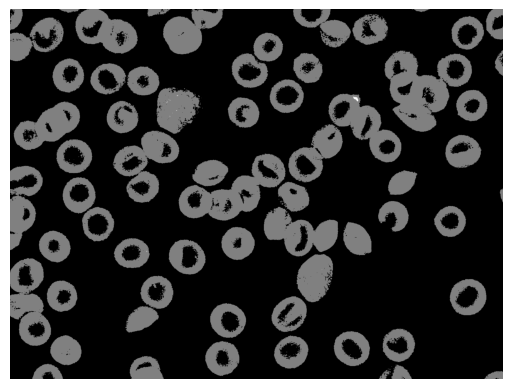

In [ ]:
canal_azul_reshape = canal_azul.reshape((-1, 1))
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(canal_azul_reshape)

# Obtener etiquetas
etiquetas = kmeans.labels_

# Reconstruir la imagen segmentada a partir de las etiquetas
img_etiquetada = etiquetas.reshape(canal_azul.shape)

# Identificar la etiqueta del fondo
etiqueta_fondo = np.argmax(np.bincount(etiquetas))

# Reasignar valores de intensidad
img_segmentada = np.zeros_like(img_etiquetada, dtype=np.uint8)  # Matriz para almacenar el resultado de la segmentación

# Asignar color negro al fondo
img_segmentada[img_etiquetada == etiqueta_fondo] = 0

# Asignar color gris a las células
img_segmentada[img_etiquetada != etiqueta_fondo] = 128

# Identificar los glóbulos rojos insanos
umbral_insanos = 60
img_segmentada[(img_etiquetada != etiqueta_fondo) & (canal_azul < umbral_insanos)] = 255  # Células infectadas en blanco

# Visualizar imagen
plt.imshow(img_segmentada, cmap='gray')
plt.axis('off')
plt.show()

La segmentación realizada puede ser eficaz para identificar ciertos trofozoítos dentro de las células infectadas, sin embargo, no logra detectar la totalidad de la célula. A pesar de esto, este método resulta útil para diferenciar las células sanas de las infectadas.

Para mejorar la detección y garantizar que se identifiquen completamente las células infectadas, se implementa un proceso adicional el cual involucra la creación de una máscara y la aplicación de la función floodFill.

Primero, se crea una máscara en blanco, la cual tiene dimensiones ligeramente mayores que la imagen segmentada para permitir un mejor manejo de los bordes. Esta máscara se inicializa con ceros (negro), y los píxeles correspondientes a los gránulos detectados previsamnete en el interior de las células infectadas (representados por el valor 255 en la imagen segmentada) se establecen como 1 en la máscara.

A continuación, se utiliza la función cv2.findContours para identificar los contornos de las células infectadas en la máscara. Esta función detecta las fronteras de los objetos en la imagen, que en este caso son las células infectadas. Al emplear el método cv2.RETR_EXTERNAL, se asegura que se consideren solo los contornos exteriores, y el uso de cv2.CHAIN_APPROX_SIMPLE reduce la cantidad de puntos en los contornos, simplificando la representación.

Una vez que se han identificado los contornos, se utiliza la función floodFill para rellenar las áreas conectadas correspondientes a cada célula infectada, actuando como un bote de pintura. El método floodFill comienza desde el centroide del rectángulo delimitador de cada contorno y llena el área conectada con el valor 255, que corresponde al blanco en la imagen.

Finalmente, se visualiza la imagen resultante que ahora muestra las células infectadas, con el interior de cada una de ellas completamente relleno.

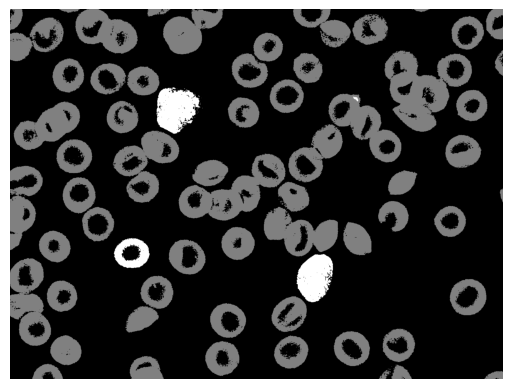

In [ ]:
# Crear máscara
mask = np.zeros((img_segmentada.shape[0] + 2, img_segmentada.shape[1] + 2), dtype=np.uint8)

# Píxeles blancos (células enfermas) a 1
mask[1:-1, 1:-1][img_segmentada == 255] = 1

# Encontrar contornos de las células enfermas
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Rellenar las áreas conectadas con floodFill
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  cv2.floodFill(img_segmentada, mask, (x + w // 2, y + h // 2), 255)  # Rellenar con blanco (255)

# Visualizar
plt.imshow(img_segmentada, cmap='gray')
plt.axis('off')
plt.show()

A continuación, se procede a binarizar la imagen para conservar únicamente las células identificadas como infectadas. Para ello, se utiliza la función cv2.threshold, estableciendo un umbral de 129. Esta operación convierte los píxeles de la imagen segmentada a 255 (blanco) si su valor es mayor o igual al umbral, y a 0 (negro) si es inferior.

Además, se aplica un filtro de tamaño que permite retener únicamente aquellos objetos cuya área sea superior a 4000 píxeles. De esta manera, se asegura que pequeños fragmentos que hayan sido segmentados por error no sean tenidos en cuenta en el análisis.

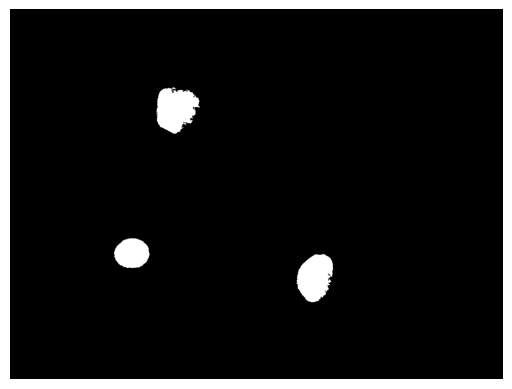

In [ ]:
# Binarizar la imagen
_, img_infectadas = cv2.threshold(img_segmentada, 129, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen binarizada
cnts = cv2.findContours(img_infectadas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Crear una imagen en blanco para dibujar los contornos filtrados
img_infectadas = np.zeros_like(img_infectadas)

# Iterar sobre cada contorno y verificar su área
for c in cnts:
    area = cv2.contourArea(c)
    if area > 4000:  # Mantener solo los objetos cuya área es mayor a 4000 píxeles
        # Dibujar los contornos en la imagen filtrada
        cv2.drawContours(img_infectadas, [c], -1, 255, thickness=cv2.FILLED)

# Mostrar la imagen filtrada
plt.imshow(img_infectadas, cmap='gray')
plt.axis('off')
plt.show()

La información resultante se almacena en la matriz img_infectadas.

## **Determinación de Célula Infectada**

Para aumentar la precisión en la identificación de las células segmentadas como efectivamente infectadas, se decidió realizar un análisis de texturas. Este análisis se basa en la variación espacial de la intensidad de los píxeles y en la caracterización de los atributos correspondientes a ventanas de la imagen, que pueden contener tanto células sanas como infectadas. A través de este enfoque, se pueden describir las propiedades estructurales de las texturas presentes en cada ventana, lo que permite diferenciar entre células infectadas y no infectadas.

En particular, se identificaron los atributos texturales de homogeneidad y contraste como los que presentan la mayor diferencia entre las células sanas e infectadas. Por lo tanto, se seleccionaron umbrales específicos, determinados mediante evaluación personal, para clasificar las células en función de estos atributos.

Para la homogeneidad, tras el análisis de numerosas imágenes, se estableció un umbral de 0.5; las células que superan este valor se consideran sanas. Por otro lado, para el contraste, se definió un umbral de 52. Cuando el contraste supera este valor, la célula se clasifica como infectada. Un alto contraste, es decir, mayor a 52 en este caso, indica grandes variaciones entre los niveles de gris de píxeles adyacentes, lo que se manifiesta en la granulosidad de las células infectadas por malaria. En cambio, un valor inferior a 52 sugiere una textura más suave y uniforme, como se observa en las células sanas.

Así, la clasificación de una célula como defectuosa depende de cumplir con ambos criterios: una textura que no sea lo suficientemente homogénea y un contraste elevado. Estos dos atributos permiten distinguir de manera efectiva entre células sanas e infectadas.

In [ ]:
cnts = cv2.findContours(img_infectadas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Encontrar los contornos en la imagen binarizada, como etiquetado
cnts = cnts[0] if len(cnts) == 2 else cnts[1] # dependiedo la version de cv2 que usemos devuelve de una forma u otra los contornos

In [ ]:
# Función para calcular las características GLCM
def analizar_glcm(imagen):
    glcm = graycomatrix(imagen, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    return contrast, energy, homogeneity, correlation

Se calculó la GLCM (Gray Level Co-Ocurrence Matrix), es decir, la matriz co-ocurrencia de niveles de gris para medir cómo se distribuyen los valores de intensidad en la imagen.

En la función denominada *glcm*, se definieron varios atributos a partir de:
1. greycomatrix(imagen, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

  La cual es una función de la librería que justamente calcula la GLCM, de modo que nos permite contar cuántas veces un par de píxeles con valores específicos aparece en una relación espacial definida. En sus argumentos tenemos:
  - imagen: corresponde a la imagen en escala de grises sobre la que se va a calcular la GLCM.
  - distances=[1]: define la distancia entre los píxeles que se están comparando. En este caso, se está considerando una distancia de 1 píxel.
  - angles=[0]: define la dirección en la que se compara un píxel con su vecino. En este caso, se escogió 0, eso es la dirección horizontal recorrida de izquierda a derecha.
  - levels=256: es el número de niveles de gris en la imagen. En este caso, al tratarse de imagenes de 8 bits se definieron 256 niveles.
  - symmetric=True: indica si la matriz es simétrica. Al definirla como True, las relaciones de un píxel con su vecino y viceversa se cuentan como iguales.
  - normed=True: para normalizar la martiz y que la suma de sus elementos sea 1.

Por otro lado, se empleó la función greycorps para extraer las propiedades de la imagen y luego poder definir un umbral para la clasificación en base a dicha información (dada como valores numéricos).
2. greycoprops(glcm, 'contrast'), greycoprops(glcm, 'energy'), etc.

  Con esta se obtuvieron los valores de contraste, energía, homogeneidad y correlación.
  - Contrast: mide la variación de intensidad entre un píxel y su vecino en la imagen. Si el contraste es alto, indica grandes diferencias de intensidad entre los píxeles adyacentes.
    
    Contraste=∑i ∑j(i−j)**2 Pi,j
  - Energy: también conocida como "angular second moment", mide la uniformidad, repetitividad o suavidad de la textura. Un valor alto de energía significa que la textura es homogénea. La energía se define como la suma de los cuadrados de los elementos de la GLCM.
    
    Energía=∑i ∑j (Pi,j)**2
  - Homogeneity: mide la proximidad de la distribución de los elementos de la GLCM a la diagonal de la matriz. Un valor alto indica que los pares de píxeles cercanos en intensidad son más frecuentes.
  - Correlation: mide el grado de correlación entre un píxel y sus vecinos, ayudando a distinguir texturas que tengan relaciones espaciales fuertes y débiles entre los niveles de gris, es decir, la consistencia.

    Correlación=∑i ∑j[(i−μi)(j−μj)Pi,j]/σiσj



Se procedió a realizar el script para analizar las subimágenes (las células identificadas como posibles infectadas) dentro de la imagen principal para decidir si están efectivamente infectadas o no, basándose en su homogeneidad y contraste.

Se creó una imagen binaria de ceros del mismo tamaño que img_infectadas llamada "img_infectadas_check" justamente para marcar las células infectadas que están representadas en blanco.

En primer lugar, luego de definir los umbrales como se ha mencionado previamente, se buscaron los contornos en la imagen binarizada "img_infectadas" usando cv2.findCountours. Cabe destacar que se usó cv2.RETR_EXTERNAL, que no tiene en cuenta los contornos anidados ya que eso sería un problema para células graulosas, y solo recupera los contornos más externos. Asimismo, se empleó cv2.CHAIN_APPROX_SIMPLE que guarda solo los puntos esenciales que representan el contorno.
El chequeo condicional con cnts = cnts[0] if len(cnts) == 2 else cnts[1] se hace posteriormenrte para ajustar cnts a la correcta, ya que cv2.findContours devuelve diversos formatos de salida según la versión.

En segundo lugar, se hizo una copia de la imagen original en canal azul para trabajar sobre esta (allí se dibujarán los rectángulos alrededor de las células infectadas).
Una vez hecho esto, se hizo un for para analizar cada subimagen. Cabe destacar que si hay solo una célula, se convierte el subplot en una lista para facilitar el for que viene después (esto se hizo con el
if n_celulas == 1:axs = [axs]).
Con el for que se muestra a continuación se extraen las subimagenes.

```
for i, c in enumerate(cnts):
    x, y, w, h = cv2.boundingRect(c)
    ROI = original[y:y+h, x:x+w]  # Extraer la subimagen (ROI)
```



Por otro lado, enumerate(cnts) lo que hace es iterar sobre cada contorno detectado, y se guardan las coordenadas x,y, y las dimensiones w, h (ancho y alto) que debe tener el rectangulo a partir de cv2.boundingRect(c), que calcula el rectángulo que encierra el contorno c.
Por su parte, se definió la región de interés como la variable ROI, la cual precisamente extrae la subimagen dentro de las coordenadas calculadas.

Para visualizar las subimágenes en escala de grises (se usó escala de grises porque daban mejores diferencias en contraste y homogeneidad) se usó Matplotlib.
Para esto, se convertieron las subimágenes usando cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

Sobre estas subimágenes, se aplicó el análisis de texturas, donde los atributos se obtuvieron a partir de la función analizar_glcm, y se aplicó el criterio de decisión previamente especificado.
Si la subimagen es defectuosa, se dibuja un rectángulo verde (color (36, 255, 12)) alrededor de ella en la imagen de copia img_rgb_copy2 con cv2.rectangle.

Finalmente, se muestra la imagen original y la imagen de copia con los rectangulos marcados.


Eritrocito 1 (Coordenadas: x=930, y=795, w=118, h=156):
  Contraste: 77.14
  Energía: 0.11
  Homogeneidad: 0.28
  Correlación: 0.98
  => El eritrocito 1 está infectado


Eritrocito 2 (Coordenadas: x=337, y=743, w=116, h=97):
  Contraste: 45.68
  Energía: 0.12
  Homogeneidad: 0.38
  Correlación: 0.97
  => El eritrocito 2 no está infectado


Eritrocito 3 (Coordenadas: x=475, y=254, w=141, h=151):
  Contraste: 103.03
  Energía: 0.12
  Homogeneidad: 0.28
  Correlación: 0.97
  => El eritrocito 3 está infectado



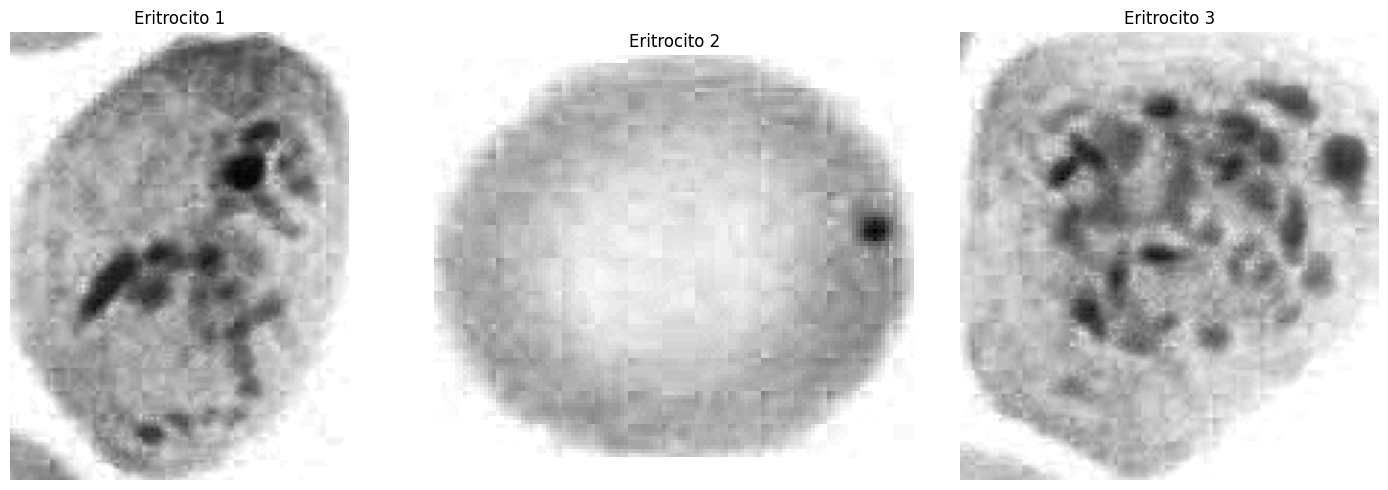

In [ ]:
# Crear una imagen binaria vacía para marcar las células defectuosas
img_infectadas_check = np.zeros_like(img_infectadas)

# Umbrales para determinar si una célula es defectuosa
umbral_homogeneidad = 0.5
umbral_contraste = 52

# Encontrar los contornos en la imagen binarizada
cnts = cv2.findContours(img_infectadas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

original = canal_azul.copy() #la hago con canal azul pq los criterios para diferenciar homogeneidad, contraste etc son mas claros

# Inicializar la figura para mostrar las subimágenes
n_celulas = len(cnts)
fig, axs = plt.subplots(1, n_celulas, figsize=(15, 5))  # Crear una fila de subplots según el número de células

# Si solo hay una célula, axs no es una lista, así que lo convertimos en una lista
if n_celulas == 1:
    axs = [axs]

for i, c in enumerate(cnts):
    x, y, w, h = cv2.boundingRect(c)
    ROI = original[y:y+h, x:x+w]  # Extraer la subimagen (ROI)

    # Mostrar cada ROI en un subplot
    axs[i].imshow(ROI, cmap='gray')
    axs[i].set_title(f'Eritrocito {i+1}')
    axs[i].axis('off')

    # Convertir ROI a escala de grises si es necesario
    if len(ROI.shape) == 3:
        ROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

    # Aplicar análisis de textura a la subimagen (ROI)
    contrast, energy, homogeneity, correlation = analizar_glcm(ROI)

    # Mostrar los resultados de las características de textura de forma más clara
    print(f"\nEritrocito {i+1} (Coordenadas: x={x}, y={y}, w={w}, h={h}):")
    print(f"  Contraste: {contrast:.2f}")
    print(f"  Energía: {energy:.2f}")
    print(f"  Homogeneidad: {homogeneity:.2f}")
    print(f"  Correlación: {correlation:.2f}")

    # Aplicar el criterio de decisión basado en homogeneidad y contraste
    if homogeneity < umbral_homogeneidad and contrast > umbral_contraste:
        print(f"  => El eritrocito {i+1} está infectado\n")

        # Dibujar el contorno de la célula defectuosa en la nueva imagen binaria
        cv2.drawContours(img_infectadas_check, [c], -1, 255, thickness=cv2.FILLED)
    else:
        print(f"  => El eritrocito {i+1} no está infectado\n")

plt.tight_layout()
plt.show()

A continuación, se muestra la imagen binaria de los eritrocitos que fueron detectados efectivamente como infectados luego del analisis de texturas.

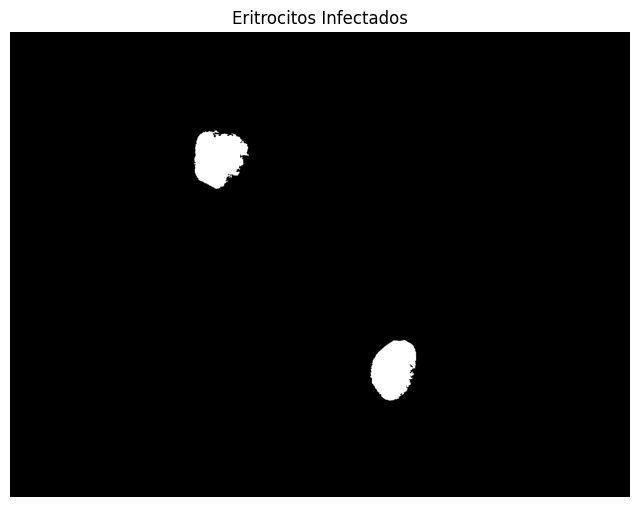

In [ ]:
# Mostrar la imagen final con las células defectuosas marcadas
plt.figure(figsize=(8, 8))
plt.imshow(img_infectadas_check, cmap='gray')
plt.title('Eritrocitos Infectados')
plt.axis('off')
plt.show()

## **Conteo de Células**

La función contar_erictrocitos permite contar eritrocitos en un frotis, tanto sanos como infectados, a partir de una imagen binarizada. La función recibe dos entradas: la imagen binarizada, donde los eritrocitos están representados como objetos blancos sobre fondo negro, y un valor de área mínima (min_area) para considerar un objeto como célula válida.

El proceso comienza utilizando la función cv2.connectedComponents para identificar los objetos conectados en la imagen. Luego, se evalúa el área de cada objeto identificado. Dependiendo de su tamaño, cada objeto puede contarse como una o más células. En particular, si el área de un objeto excede ciertos umbrales, se asume que corresponde a varias células, ajustando el conteo en consecuencia. La función devuelve el número total de eritrocitos detectados y una imagen etiquetada con las células identificadas.

In [ ]:
def contar_erictrocitos(img_binaria, min_area):

    # Aplicar connectedComponents para contar los objetos (incluye el fondo)
    num_labels, labels = cv2.connectedComponents(img_binaria)

    # Inicializar contador de células válidas
    num_celulas = 0

    # Recorrer las labels para contar solo las que tienen un área mayor al mínimo definido
    for label in range(1, num_labels):  # Empezar desde 1 porque 0 es el fondo
        area = np.sum(labels == label)
        if area >= min_area:
            if area > (min_area*4):
                num_celulas += 4  # Cuenta como 4 células
            elif area > (min_area*3):
                num_celulas += 3  # Cuenta como 3 células
            elif area > (min_area*2):
                num_celulas += 2  # Cuenta como 2 células
            else:
                num_celulas += 1  # Cuenta como 1 célula

    return num_celulas, labels

En primer lugar, para poder realizar el conteo con la función anteriormente definida, debemos obtener imágenes binarizadas de los eritrocitos infectados y sanos por separado. La primera se genera a partir de la segmentación realizada en pasos anteriores, mientras que la segunda se obtiene mediante la resta de la imagen binarizada que contiene todos los eritrocitos menos la de los eritrocitos infectados.

Para garantizar que la resta sea más precisa y que se capten los posibles píxeles que no se hayan pintado de blanco tras aplicar el algoritmo de flood fill, se aplican operaciones de morfología matemática a la imagen de los eritrocitos infectados.

Como primer paso, se realiza una dilatación, que expande las áreas blancas de la imagen binarizada. Este proceso ayuda a unir estructuras que podrían haber quedado fragmentadas durante la segmentación. Se utiliza un kernel de tamaño 9x9 y se aplican 6 iteraciones para lograr este efecto.

A continuación, se aplica una erosión sobre la imagen dilatada, utilizando el mismo kernel, pero esta vez con 3 iteraciones. Esta operación ajusta las formas detectadas al eliminar posibles excesos que puedan haberse introducido durante la dilatación, mejorando así la precisión en la identificación de las áreas infectadas.

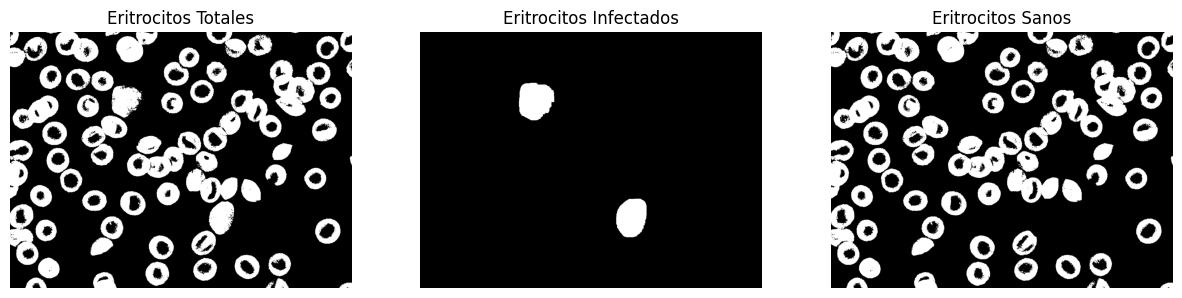

In [ ]:
# Definir el kernel
kernel = np.ones((9, 9), 'uint8')

# Aplicar dilatación
img_dilatada = cv2.dilate(img_infectadas_check, kernel, iterations=6)

# Aplicar erosión
img_erosionada = cv2.erode(img_dilatada, kernel, iterations=3)

# Imagen mejorada de las células infectadas
img_infectadas_mejorada = img_erosionada

# Binarizar la imagen de todas las células
_, img_segmentada_binarizada = cv2.threshold(img_segmentada, 10, 255, cv2.THRESH_BINARY)

# Restar de imágenes
img_sanas = img_segmentada_binarizada - img_infectadas_mejorada

# Visualizar
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_segmentada_binarizada, cmap='gray')
plt.title('Eritrocitos Totales')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_infectadas_mejorada, cmap='gray')
plt.title('Eritrocitos Infectados')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_sanas, cmap='gray')
plt.title('Eritrocitos Sanos')
plt.axis('off')

plt.show()

Finalmente, se realizar el conteo de células mediante la aplicación de la función contar_eritrocitos, y se presentan los resultados correspondientes. Los umbrales de area mínima empleados fueron determinados de manera empírica, tras llevar a cabo pruebas con diferentes valores y seleccionar aquellos que ofrecían el mejor ajuste para múltiples imágenes. Se utilizaron valores mayores para el conteo de células infectadas respecto de las no infectadas, dado que, debido a su patología, estas últimas tienden a exhibir un tamaño mayor.

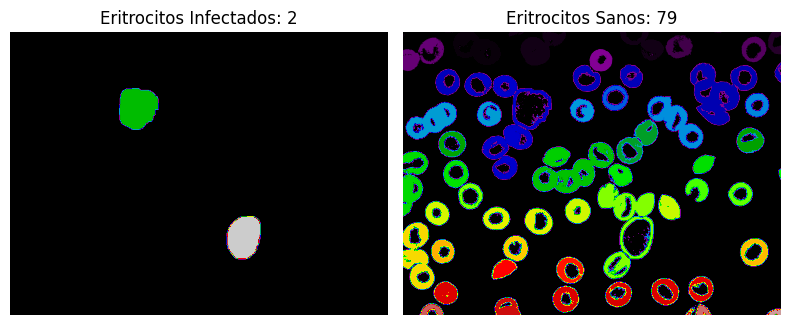

In [ ]:
# Aplicar la función a la imagen de eritrocitos sanos
num_celulas_sanas, labels_sanas = contar_erictrocitos(img_sanas, 4500)

# Aplicar la función a la imagen de eritrocitos infectados
num_celulas_infectadas, labels_infectadas = contar_erictrocitos(img_infectadas_mejorada, 15000)

# Crear una figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Ploteo de los eritrocitos infectados
axes[0].imshow(labels_infectadas, cmap='nipy_spectral')
axes[0].set_title(f'Eritrocitos Infectados: {num_celulas_infectadas}')
axes[0].axis(False)

# Ploteo de los eritrocitos sanos
axes[1].imshow(labels_sanas, cmap='nipy_spectral')
axes[1].set_title(f'Eritrocitos Sanos: {num_celulas_sanas}')
axes[1].axis(False)

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

## **Visualización de Resultados**

Para visualizar los resultados, utilizamos la técnica de Bounding Box, marcando con rectángulos verdes las células identificadas como infectadas en la imagen original. Además, se muestra la cantidad de eritrocitos infectados detectados en relación con el total de eritrocitos contados en la muestra.

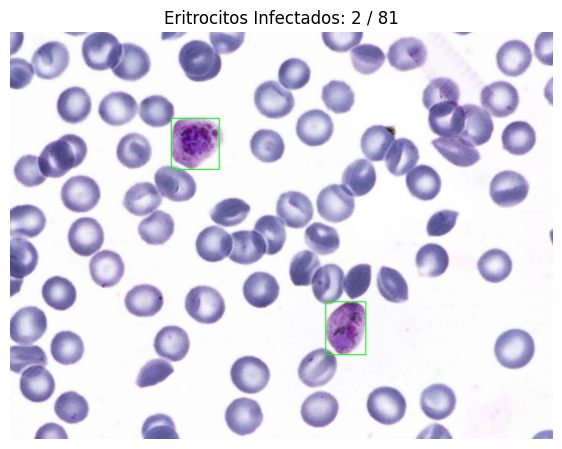

In [ ]:
# Copia de la imagen original para no modificarla
img_final = img_rgb.copy()

# Encontrar los contornos en la imagen binarizada de las infectadas
cnts_infectadas = cv2.findContours(img_infectadas_check, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_infectadas = cnts_infectadas[0] if len(cnts_infectadas) == 2 else cnts_infectadas[1]

# Dibujar bounding boxes en img_final
for c in cnts_infectadas:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_final, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Dibuja un rectángulo verde

# Mostrar la imagen final con las bounding boxes
plt.figure(figsize=(7, 7))
plt.imshow(img_final)
plt.title(f'Eritrocitos Infectados: {num_celulas_infectadas} / {num_celulas_sanas + num_celulas_infectadas}')
plt.axis('off')  # Ocultar los ejes para mejor visualización
plt.show()

# **RESULTADOS**

Se procesaron 15 imágenes de frotis sanguíneo con el algoritmo diseñado para detectar glóbulos rojos infectados por malaria. De las 15 imágenes, 11 fueron procesadas exitosamente, con detección precisa de las células infectadas. En estas imágenes, el algoritmo segmentó correctamente las células parasitadas, las marcó en las imágenes procesadas mediante bounding boxes y realizó el conteo de células infectadas en relación con el total de glóbulos rojos presentes.

Sin embargo, en 4 de las imágenes, el algoritmo no pudo separar correctamente células infectadas que estaban pegadas a células sanas. Este problema surgió debido a que las técnicas utilizadas no lograron segmentar adecuadamente estas células unidas, lo que llevó a que el algoritmo las interpretara como una única célula. Esto afectó tanto la precisión del conteo como la tasa de detección en estos casos.

Por otro lado, el conteo general de células sanas fue cercano al conteo manual, con una diferencia menor a 10 células en todos los casos. Sin embargo, la dificultad para segmentar células pegadas afectó el conteo exacto en los casos fallidos.

En cuanto a la tasa de efectividad del algoritmo, se logró una detección exitosa en el 73.33% de las imágenes procesadas (11 de 15). En las imágenes donde las células infectadas no estaban en contacto directo con otras, el algoritmo mostró un desempeño óptimo. No obstante, la incapacidad de segmentar células pegadas limitó la efectividad en los casos restantes.

A continuación se muestran las imagenes que fueron procesadas con éxito, donde las células infectadas están correctamente marcadas y separadas.

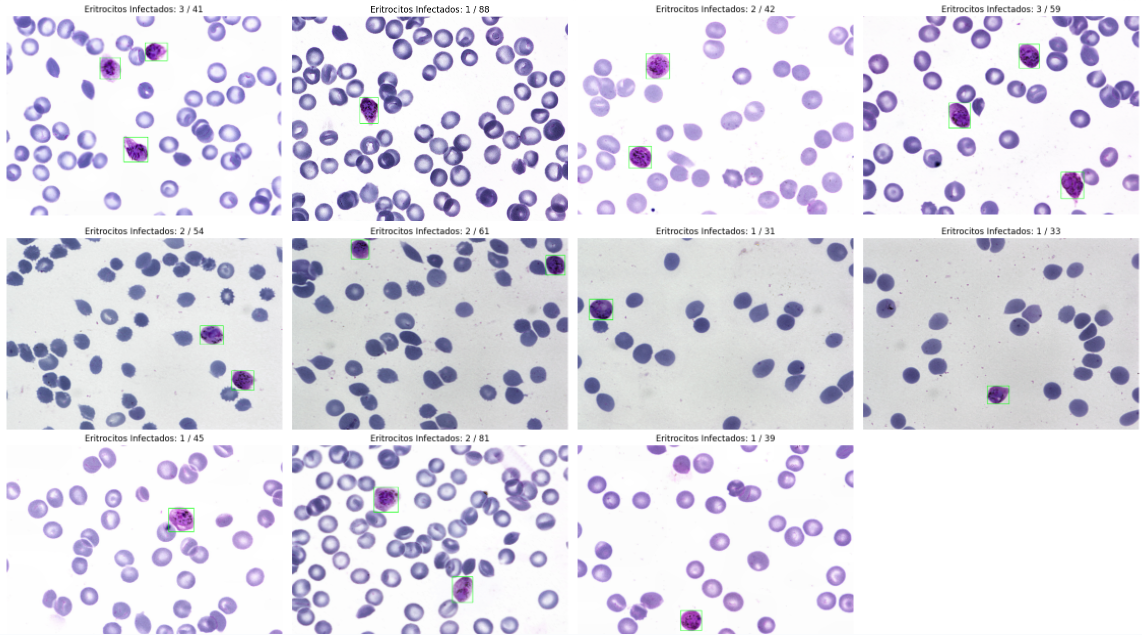

Por otro lado, se muestran aquellas imágenes en las que el algoritmo falló:

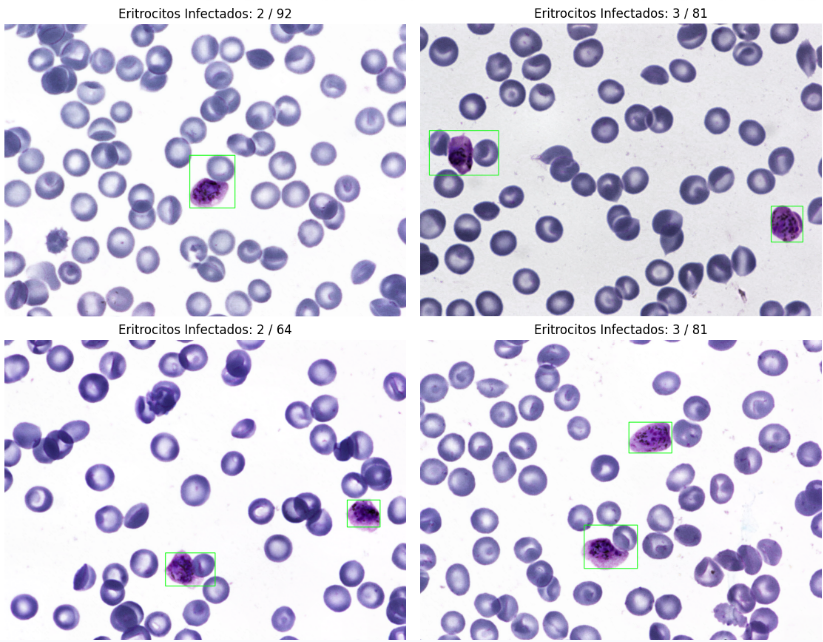

Estos resultados evidencian que, aunque el algoritmo es efectivo en la mayoría de los casos, la limitación en la separación de células pegadas impacta la precisión global del sistema. La incorporación de técnicas adicionales o mejoras en el código podrían resolver este problema en versiones futuras.

# **CONCLUSIONES**

Si bien no es posible un diagnóstico preciso con sólo una imagen del frotis de un paciente, ya que se requiere más de un campo de visión de la muestra, ésta herramienta de detección podría ser mejorada para su aplicación en un dispositivo que recopile varias imágenes correspondientes a un mismo frotis. Esto permitiría un análisis más exhaustivo y detallado.

En futuras mejoras, se podría explorar el uso de técnicas de aprendizaje automático (*machine learning*) para optimizar la segmentación de células agrupadas. Además, sería posible implementar un modelo de clasificación que diferenciara las células parasitadas según su fase de infección, ya sea temprana o avanzada. La integración de estos componentes automatizados no solo aceleraría el proceso de diagnóstico, sino que también reduciría la dependencia de la experiencia técnica del personal, lo cual es un factor crucial en regiones con recursos limitados.

Otra mejora importante sería la implementación de una interfaz gráfica de usuario (GUI), lo que permitiría a los usuarios cargar sus propias imágenes para ser analizadas. Esta interfaz también facilitaría una visualización más clara y accesible de los resultados, mejorando así la experiencia del usuario durante el proceso de diagnóstico.

En conclusión, el desarrollo de este sistema (en un futuro automatizado) para la detección de malaria, a partir del análisis de frotis sanguíneos con Python, demuestra el potencial de las técnicas de procesamiento de imágenes aplicadas a la medicina diagnóstica. A lo largo de este proyecto, se implementaron métodos eficientes para segmentar glóbulos rojos, identificar parásitos y realizar un conteo preciso de células infectadas. La adición del análisis de texturas a la segmentación inicial permitió mejorar la precisión del diagnóstico. Los resultados obtenidos indican que este enfoque podría ser una herramienta viable para la detección de malaria, especialmente en entornos donde el acceso a equipos especializados es limitado.

#**ANEXO**


Se evaluó hacer un preprocesamiento, pero no alteraba el resultado final. Por lo tanto, se decidió tras consultar con algunos de los profesores responsables eliminarlo de los pasos generales de modo de eficientizar el código y evitar contenido irrelevante.

Se evaluó la aplicación de filtros gaussianos, de mediana (para un ruido parecido a sal y pimienta). El filtro gaussiano se descartó porque el mismo disminuía la definición de los bordes, lo cual era útil para la segmentación de las células. El filtro de mediana no se decidió utilizar, ya que no aportaba una mejora significativa al resultado final y era poco eficiente.

In [ ]:
from scipy.signal import convolve2d

In [ ]:
def gaussian_filter(image, kernel_size, sigma):

  # Verificar que el tamaño del kernel sea impar
  if kernel_size % 2 == 0:
      raise ValueError("El tamaño del kernel debe ser un número impar.")

  else:
    # Crear el kernel gaussiano
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 * sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)

    # Aplicar convolución
    filtered_image = convolve2d(image, kernel, mode='same', boundary='wrap')

    return filtered_image

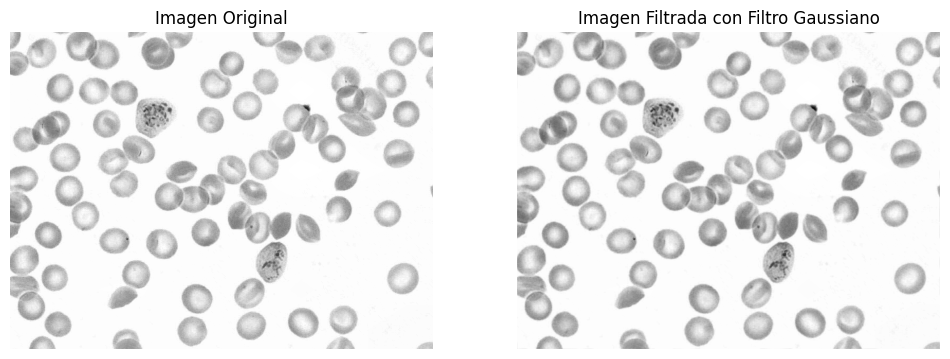

In [ ]:
# Aplicar el filtro gaussiano
kernel_size = 5  # Debe ser impar
sigma = 1.0  # Desviación estándar
img_filtrada = gaussian_filter(canal_azul, kernel_size, sigma)

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada, cmap='gray')
plt.title('Imagen Filtrada con Filtro Gaussiano')
plt.axis('off')

plt.show()

In [ ]:
def zero_padding(image, pad_size):
  '''
  La función zero_padding aplica zero-padding a una imagen de cualquier tamaño.

  Parámetros:
    - image (numpy array): Imagen en escala de grises
    - pad_size (int): Tamaño del padding (número de píxeles) a agregar en cada borde de la imagen.

  '''

  # Obtener las dimensiones de la imagen original
  height, width = image.shape

  # Aplicar el padding a la imagen
  padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

  return padded_image

In [ ]:
def median_filter(image, kernel_size):

  # Verificar que el tamaño del kernel sea impar
  if kernel_size % 2 == 0:
      raise ValueError("El tamaño del kernel debe ser un número impar.")

  # Obtener las dimensiones de la imagen
  height, width = image.shape

  # Crear una imagen con padding para manejar los bordes
  pad_size = kernel_size // 2
  padded_image = zero_padding(image, pad_size)

  # Crear una matriz vacía
  filtered_image = np.zeros_like(image)

  # Aplicar el filtro de mediana
  for i in range(height):
      for j in range(width):
          neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
          median_value = np.median(neighborhood)
          filtered_image[i, j] = median_value

  return filtered_image

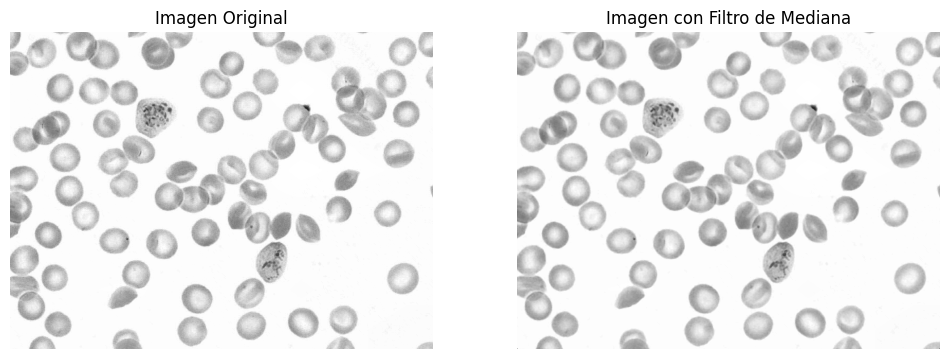

In [ ]:
img_mediana = median_filter(canal_azul, 5)

# Mostrar la imagen original y la imagen filtrada usando matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')  # Ocultar los ejes

plt.subplot(1, 2, 2)
plt.imshow(img_mediana, cmap='gray')
plt.title('Imagen con Filtro de Mediana')
plt.axis('off')  # Ocultar los ejes

plt.show()

Además, se probó la alternativa de utilizar un algoritmo de Watershed para la segmentación. Como se puede observar, aplicar el mismo a la imagen de canal azul no segmenta las células como se esperaba. Por este motivo, se descartó su implementación.

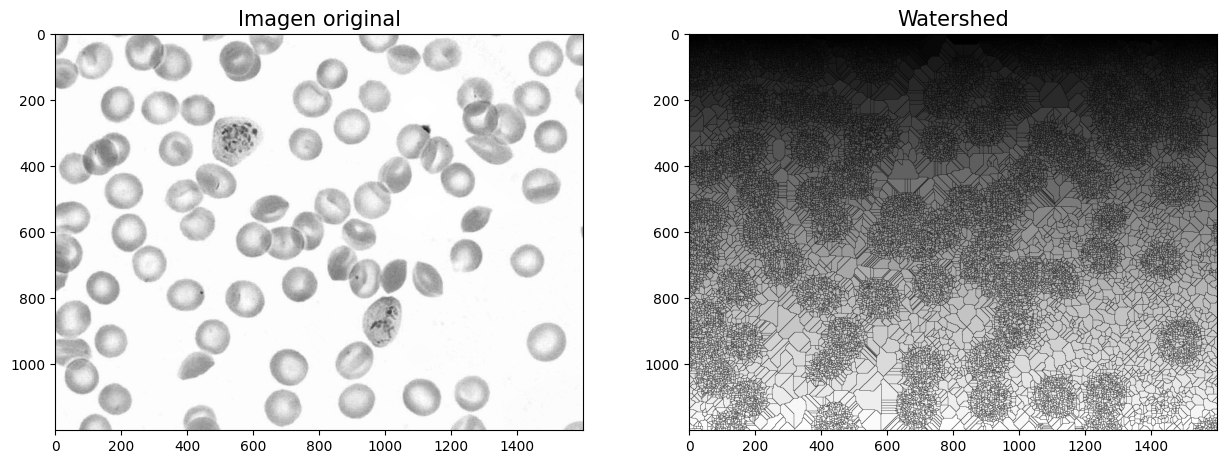

In [ ]:
imgwater = sitk.GetImageFromArray(canal_azul)

ws_img = sitk.MorphologicalWatershed(imgwater, level=0, markWatershedLine=True, fullyConnected=True)

imagen_ws = sitk.GetArrayFromImage(ws_img)

fig,ax = plt.subplots(1, 2, figsize=(15,20))
ax[0].imshow(canal_azul,cmap='gray')
ax[0].set_title('Imagen original',fontsize=15)
ax[1].imshow(imagen_ws,cmap='gray')
ax[1].set_title('Watershed',fontsize=15)
plt.show()

#**BIBLIOGRAFÍA**

1. Organización Mundial de la Salud, "Paludismo," OMS, 2023. [En línea]. Disponible en: https://www.who.int/es/news-room/fact-sheets/detail/malaria
2. Organización Mundial de la Salud, World Malaria Report 2023, 2023. [En línea]. Disponible en: https://www.who.int/publications/i/item/9789240086173
3. R. S. Bray, "Malaria", National Center for Biotechnology Information (NCBI), 2001. [En línea]. Disponible en: https://www.ncbi.nlm.nih.gov/books/NBK1695/
4. Centers for Disease Control and Prevention, "Malaria Diagnosis and Testing," CDC, 2023. [En línea]. Disponible en: https://www.cdc.gov/malaria/hcp/diagnosis-testing/malaria-diagnostic-tests.html
5. Y. Eisele et al., "Developments in malaria diagnostics and treatment," ScienceDirect, 2022. [En línea]. Disponible en: https://www.sciencedirect.com/science/article/pii/S2667114X22000127
6. Medmastery, "How to identify the type of malaria in a blood smear," 2023. [En línea]. Disponible en: https://www.medmastery.com/guides/malaria-clinical-guide/how-identify-type-malaria-blood-smear
7. N. Smith et al., "Review on Malaria Diagnosis," Translational Research, 2017. [En línea]. Disponible en: https://www.translationalres.com/article/S1931-5244(17)30333-X/fulltext
8. Centers for Disease Control and Prevention, "Malaria Diagnostic Comparison Aid," CDC Bench Aids, 2023. [En línea]. Disponible en: https://www.cdc.gov/dpdx/resources/pdf/benchaids/malaria/malaria_comparison_p3-6.pdf
9. Vitrosens, "How is Malaria Detected?", 2023. [En línea]. Disponible en: https://vitrosens.com/how-is-malaria-detected/
10. Centers for Disease Control and Prevention, "Plasmodium falciparum Bench Aid," CDC, 2023. [En línea]. Disponible en: https://www.cdc.gov/dpdx/resources/pdf/benchAids/malaria/Pfalciparum_benchaidV2.pdf
11. Centers for Disease Control and Prevention, "Plasmodium vivax Bench Aid," CDC, 2023. [En línea]. Disponible en: https://www.cdc.gov/dpdx/resources/pdf/benchAids/malaria/Pvivax_benchaidV2.pdf
12. Centers for Disease Control and Prevention, "Plasmodium ovale Bench Aid," CDC, 2023. [En línea]. Disponible en: https://www.cdc.gov/dpdx/resources/pdf/benchAids/malaria/Povale_benchaidV2.pdf
13. Centers for Disease Control and Prevention, "Plasmodium malariae Bench Aid," CDC, 2023. [En línea]. Disponible en: https://www.cdc.gov/dpdx/resources/pdf/benchAids/malaria/Pmalariae_benchaidV2.pdf
14. M. McKenzie et al., "Malaria Genomics and Drug Resistance," ScienceDirect, 2008. [En línea]. Disponible en: https://www.sciencedirect.com/science/article/pii/S1532046408001470
15. K. Mader, "Malaria Bounding Boxes," Kaggle, 2018. [En línea]. Disponible en: https://www.kaggle.com/datasets/kmader/malaria-bounding-boxes/data
16. G. S. Smith et al., "Automated malaria diagnosis using digital image processing of blood smears: A survey," PeerJ, vol. 8, 2020. [En línea]. Disponible en: https://peerj.com/articles/9674/
17. H. S. Choi et al., "Genetic diversity and evolutionary history of Plasmodium vivax in Korea," PubMed, 2012. [En línea]. Disponible en: https://pubmed.ncbi.nlm.nih.gov/23196001/
18. M. J. Clark et al., "Global malaria epidemiology: A review of the 2020 malaria report," Journal of Tropical Medicine, vol. 2020, Article 8895429, 2020. [En línea]. Disponible en: https://onlinelibrary.wiley.com/doi/10.1155/2020/8895429
19. S. J. Liu et al., "Factors influencing malaria transmission in endemic areas: A review of the literature," PubMed, 2017. [En línea]. Disponible en: https://pubmed.ncbi.nlm.nih.gov/28442456/



